In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


ModuleNotFoundError: No module named 'd2l'

In [ ]:
def synthematic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # Radom noise
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthematic_data(true_w, true_b, 1000)

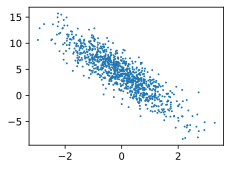

In [ ]:
# features[:, 1], labels[0]
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [ ]:
# Small batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5419, -0.4456],
        [ 0.1381, -0.8316],
        [ 0.0364, -1.2050],
        [ 0.8398, -0.1574],
        [-1.5409, -0.8561],
        [ 0.6117,  0.2938],
        [ 1.3446, -0.3712],
        [ 0.3803,  0.0143],
        [-0.6848,  0.5944],
        [-1.5099,  0.5191]]) 
 tensor([[ 6.8052],
        [ 7.3040],
        [ 8.3573],
        [ 6.4146],
        [ 4.0431],
        [ 4.4164],
        [ 8.1635],
        [ 4.9087],
        [ 0.7829],
        [-0.5824]])


In [ ]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
# Define the linear regression model
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [ ]:
# Define the loss function
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
# Define the optimization algorithm
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param.data -= lr * param.grad / batch_size  # /batch_size is for averaging
            param.grad.data.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # For each batch
    for X, y in data_iter(batch_size, features, labels):
        # l is a vector with a shape of (batch_size, 1), the loss of each example in the batch
        l = loss(net(X, w, b), y)  # l is the small-batch loss of X and y
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034252
epoch 2, loss 0.000130
epoch 3, loss 0.000049


In [ ]:
print(f'w: {w.reshape(true_w.shape)}, true w: {true_w}, \nb: {b}, true b: {true_b}')
print(f'w\'s variance: {true_w - w.reshape(true_w.shape)}, b\'s variance: {true_b - b}')

w: tensor([ 1.9993, -3.3999], grad_fn=<ViewBackward0>), true w: tensor([ 2.0000, -3.4000]), 
b: tensor([4.1991], requires_grad=True), true b: 4.2
w's variance: tensor([ 6.9368e-04, -5.9843e-05], grad_fn=<SubBackward0>), b's variance: tensor([0.0009], grad_fn=<RsubBackward1>)


In [ ]:
from torch.utils import data

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features2, labels2 = synthematic_data(true_w, true_b, 1000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)  # DataLoader type: iterator

batch_size = 10
data_iter2 = load_array((features2, labels2), batch_size)

next(iter(data_iter2))  # Get the first batch

[tensor([[ 0.1411,  0.0650],
         [-0.7862,  0.6376],
         [ 1.8743,  0.4471],
         [ 0.4611,  1.0162],
         [ 1.8919, -0.4591],
         [-0.1604, -0.6034],
         [ 1.9056,  0.4430],
         [-0.0207, -0.9541],
         [-0.5511, -0.0514],
         [ 1.0882,  0.3016]]),
 tensor([[4.2616],
         [0.4506],
         [6.4247],
         [1.6820],
         [9.5374],
         [5.9429],
         [6.5024],
         [7.4152],
         [3.2812],
         [5.3473]])]

In [ ]:
# nn is the neural network module
import torch.nn as nn

net = nn.Sequential(nn.Linear(2, 1))  # Arguments: input dimension, output dimension

In [ ]:
net[0].weight.data.normal_(0, 0.01)  # Initialize the weight
net[0].bias.data.fill_(0)  # Initialize the bias

tensor([0.])

In [ ]:
loss = nn.MSELoss()  # Mean Squared Error Loss

In [ ]:
# Initialize the optimizer
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter2:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

    l = loss(net(features2), labels2)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000232
epoch 2, loss 0.000099
epoch 3, loss 0.000099
